# Functions

In [1]:
import numpy as np
import random
import timeit
import matplotlib.pyplot as plt

def generate_matrix_with_missing_number():
    # Choose a random number between 1 and 99 to remove
    missing = random.randint(1, 99)    
    # Create the list from 1 to 100, excluding the missing number
    numbers = [i for i in range(1, 101) if i != missing]
    # Organize into a matrix of 11 rows × 9 columns (99 elements)
    matrix = []
    for i in range(11):
        row = numbers[i * 9 : (i + 1) * 9]  # slice 9 numbers per row
        matrix.append(row)
    # Create the flattened array from the matrix
    flat_array = [x for row in matrix for x in row]
    return matrix, flat_array, missing

def naive_approach(arr):
    """
    Naive Approach: Linear Search for Missing Number - O(n^2) Time and O(1) Space

    This approach iterates through each number from 1 to n (where n is the size of the array + 1) 
    and checks if the number is present in the array. For each number, it uses a nested loop to 
    search the array. If a number is not found, it is returned as the missing number. 
    """
    expected_sum = sum(range(1, 101))  # Soma de 1 a 100 = 5050
    actual_sum = sum(arr)
    return expected_sum - actual_sum

def using_hashing(arr):
    """
    Using Hashing - O(n) Time and O(n) Space
    This approach uses a hash array (or frequency array) to track the presence of each 
    number from 1 to n in the input array. It first initializes a hash array to store 
    the frequency of each element. Then, it iterates through the hash array to find 
    the number that is missing (i.e., the one with a frequency of 0).
    """
    seen = set(arr)
    
    for num in range(1, 101):
        if num not in seen:
            return num
    
    return -1  # Should never happen if input is valid

def sum_nterms(arr):
    """
    Using Sum of n terms Formula - O(n) Time and O(1) Space

    The sum of the first n natural numbers is given by the formula (n * (n + 1)) / 2.
    The idea is to compute this expected sum and subtract the sum of all elements in the array
    to get the missing number.
    Parameters:
        arr (list[int]): A list of n - 1 distinct integers from 1 to n (inclusive),
                         where one number is missing.
    Returns: 
        int: The missing number in the range [1, n].
    """
    n = len(arr) + 1
    expected_sum = n * (n + 1) // 2
    actual_sum = sum(arr)
    return expected_sum - actual_sum

def using_xor(arr):
    """
    Using XOR Operation - O(n) Time and O(1) Space

    XOR of a number with itself is 0 (i.e., x ^ x = 0), and XOR of a number with 0 is the number itself (x ^ 0 = x).
    Given that the array contains n - 1 elements from the range [1, n], we can XOR all numbers from 1 to n,
    and XOR all elements in the array. The missing number will be the XOR of these two results.

    Parameters:
        arr (list[int]): A list of n - 1 distinct integers from 1 to n (inclusive), with one missing number.
    
    Returns:
        int: The missing number in the range [1, n].
    """
    n = len(arr) + 1
    xor_full = 0
    xor_arr = 0

    for num in arr:
        xor_arr ^= num

    for i in range(1, n + 1):
        xor_full ^= i

    return xor_full ^ xor_arr

# Benchmarking function
def benchmark_missing_number_algorithms_with_plot():
    matrix, flat_array, missing = generate_matrix_with_missing_number()
    functions = {
        'Naive (Sum Trick)\nO(n) Time, O(1) Space': naive_approach,
        'Using Hashing\nO(n) Time, O(n) Space': using_hashing,
        'Sum Formula\nO(n) Time, O(1) Space': sum_nterms,
        'Using XOR\nO(n) Time, O(1) Space': using_xor,
    }

    times = {}
    for label, func in functions.items():
        stmt = lambda: func(flat_array)
        exec_time = timeit.timeit(stmt, number=10000)
        times[label] = exec_time

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.bar(times.keys(), times.values(), color='skyblue')
    plt.ylabel('Execution Time (seconds for 10,000 runs)')
    plt.title('Performance Comparison of Missing Number Algorithms')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.xticks(rotation=10, ha='right')
    plt.show()

#
def benchmark_algorithms_time_vs_n_line_plot():
    matrix, flat_array, missing = generate_matrix_with_missing_number()
    
    functions = {
        'Naive (Sum Trick)\nO(n) Time, O(1) Space': naive_approach,
        'Using Hashing\nO(n) Time, O(n) Space': using_hashing,
        'Sum Formula\nO(n) Time, O(1) Space': sum_nterms,
        'Using XOR\nO(n) Time, O(1) Space': using_xor,
    }

    # Store execution times for each algorithm per input size
    timing_data = {label: [] for label in functions}

    for n in input_sizes:
        # Generate test data
        missing = random.randint(1, n)
        arr = [i for i in range(1, n + 1) if i != missing]

        for label, func in functions.items():
            stmt = lambda: func(arr)
            exec_time = timeit.timeit(stmt, number=10)
            timing_data[label].append(exec_time)

    # Plot line graph: time as a function of n
    plt.figure(figsize=(12, 6))
    for label, times in timing_data.items():
        plt.plot(input_sizes, times, marker='o', label=label)

    plt.xlabel('Input Size (n)')
    plt.ylabel('Execution Time (seconds for 10 runs)')
    plt.title('Execution Time vs Input Size for Missing Number Algorithms')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    
def benchmark_algorithms_time_vs_n_line_plot():
    input_sizes = [10, 100, 1000, 5000, 10000, 20000, 40000, 50000, 80000, 100000] 
    
    functions = {
        'Naive (Sum Trick)\nO(n) Time, O(1) Space': naive_approach,
        'Using Hashing\nO(n) Time, O(n) Space': using_hashing,
        'Sum Formula\nO(n) Time, O(1) Space': sum_nterms,
        'Using XOR\nO(n) Time, O(1) Space': using_xor,
                }

    # Store execution times for each algorithm per input size
    timing_data = {label: [] for label in functions}

    for n in input_sizes:
        # Generate test data
        missing = random.randint(1, n)
        arr = [i for i in range(1, n + 1) if i != missing]

        for label, func in functions.items():
            stmt = lambda: func(arr)
            exec_time = timeit.timeit(stmt, number=10)
            timing_data[label].append(exec_time)

    # Plotting
    plt.figure(figsize=(12, 6))
    for name, times in timing_data.items():
        plt.plot(input_sizes, times, marker='o', label=name)

    plt.xlabel('Input Size (n)')
    plt.ylabel('Execution Time (seconds for 10 runs)')
    plt.title('Execution Time vs Input Size')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


# Introduction

## Benchmarking Missing Number Detection Algorithms in Python

This notebook benchmarks different algorithms for solving a classic problem: **Given an array of integers from 1 to n, with one number missing, find the missing number**. The input array contains all numbers from 1 to 100 except for one randomly removed number. The data is structured into a 11×9 matrix (99 elements), which is flattened for processing. We implement four algorithmic approaches with different time and space complexities, and compare their execution performance.

The workflow begins with the function `generate_matrix_with_missing_number()`, which creates the dataset for all experiments. It constructs the sequence of integers from 1 to 100, randomly removes one number from this range, and then organizes the remaining 99 elements into a matrix with 11 rows and 9 columns. Although this matrix is returned for completeness, the main object of interest is the flattened one-dimensional array, which is later processed by the different algorithms to recover the missing value. The missing number itself is also returned, so we can verify the correctness of each method.

| Algorithm         | Function         | Time Complexity | Space Complexity | Description                                      |
| ----------------- | ---------------- | --------------- | ---------------- | ------------------------------------------------ |
| Naive (Sum Trick) | `naive_approach` | O(n)            | O(1)             | Uses arithmetic sum of 1 to 100 minus actual sum |
| Using Hashing     | `using_hashing`  | O(n)            | O(n)             | Uses a `set` to track presence                   |
| Sum Formula       | `sum_nterms`     | O(n)            | O(1)             | Computes expected sum via `(n·(n+1))//2`         |
| XOR Method        | `using_xor`      | O(n)            | O(1)             | Uses XOR identity to find the missing number     |


## Theoretical motivation

The first algorithm, implemented in `naive_approach(arr)`, follows the idea that the sum of the first $(n)$ natural numbers is known in advance. For a full set of numbers from 1 to $(n)$, the expected sum is

$$
S_n = 1 + 2 + 3 + \dots + n = \frac{n(n+1)}{2}.
$$

If one number $(m)$ is missing, the sum of the array will be $(S_n - m)$. By computing the difference between the expected sum and the actual sum of the array, we directly obtain the missing number 

$$(m = S_n - \sum(\text{arr})).$$ 

This approach runs in $O(n)$ time and uses only constant memory.

The function `using_hashing(arr)` approaches the problem differently by leveraging a hash set to keep track of which elements appear in the array. After inserting all numbers from the input into a set, it iterates from 1 to $(n)$ and checks which element is absent. The first number not found in the set is the missing one. Although this method is also $O(n)$ in time, it requires $O(n)$ additional memory for the hash table.

The `sum_nterms(arr)` function formalizes the same idea as the naive approach but expresses it directly in terms of the closed-form formula for the sum of the first $(n)$ natural numbers. Again, the expected sum is computed as

$$
S_n = \frac{n(n+1)}{2},
$$

and subtracting the sum of the input array from this value yields the missing number. This is the most direct and memory-efficient method because it relies solely on arithmetic properties and does not require extra data structures.

Finally, the `using_xor(arr)` function exploits the properties of the bitwise XOR operation. Because the XOR of any number with itself is zero $(x \oplus x = 0)$ and the XOR of any number with zero is the number itself $( x \oplus 0 = x )$, the XOR of all integers from 1 to $(n)$ combined with the XOR of all elements in the input array will cancel out every number that appears in both sets, leaving only the missing number. Formally, if

$$
X = 1 \oplus 2 \oplus 3 \oplus \dots \oplus n
$$

and

$$
Y = a_1 \oplus a_2 \oplus \dots \oplus a_{n-1}
$$

for the array elements $(a_i)$, then the missing number is

$$
m = X \oplus Y.
$$

This method also runs in linear time but uses constant memory, making it attractive when arithmetic overflow or large datasets might challenge the summation methods.

# Tests

In [2]:
arr, flat_arr, missing = generate_matrix_with_missing_number()

print('missing number:', missing)
arr

missing number: 19


[[1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18],
 [20, 21, 22, 23, 24, 25, 26, 27, 28],
 [29, 30, 31, 32, 33, 34, 35, 36, 37],
 [38, 39, 40, 41, 42, 43, 44, 45, 46],
 [47, 48, 49, 50, 51, 52, 53, 54, 55],
 [56, 57, 58, 59, 60, 61, 62, 63, 64],
 [65, 66, 67, 68, 69, 70, 71, 72, 73],
 [74, 75, 76, 77, 78, 79, 80, 81, 82],
 [83, 84, 85, 86, 87, 88, 89, 90, 91],
 [92, 93, 94, 95, 96, 97, 98, 99, 100]]

In [3]:
naive_approach(flat_arr)

19

In [4]:
using_hashing(flat_arr)

19

In [5]:
sum_nterms(flat_arr)

19

In [6]:
using_xor(flat_arr)

19

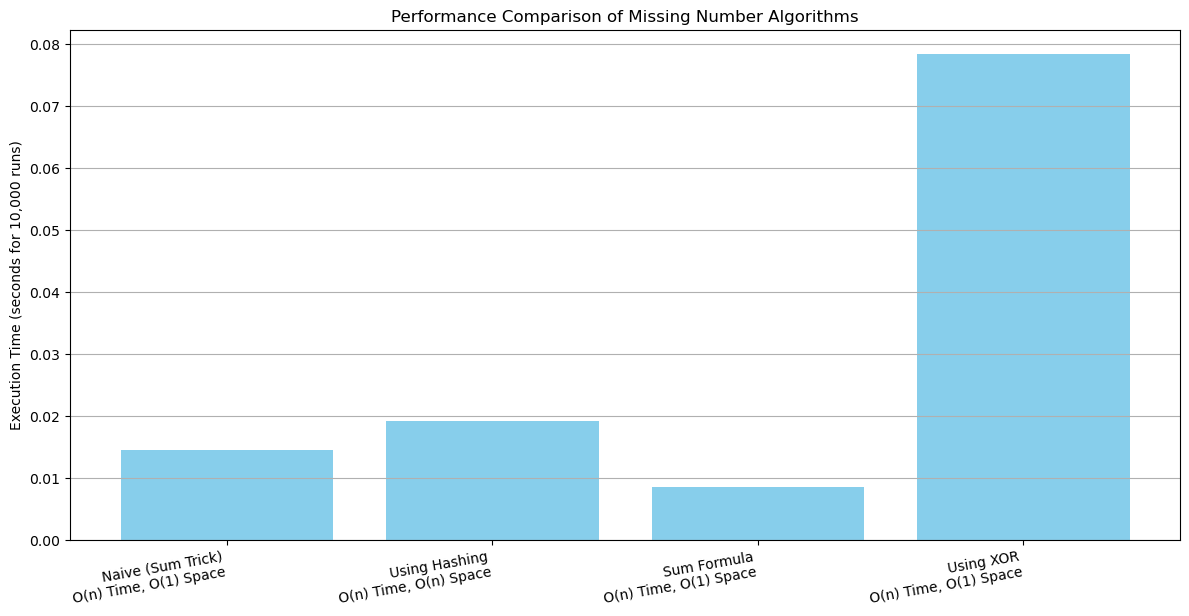

In [7]:
# Run the updated version
benchmark_missing_number_algorithms_with_plot()

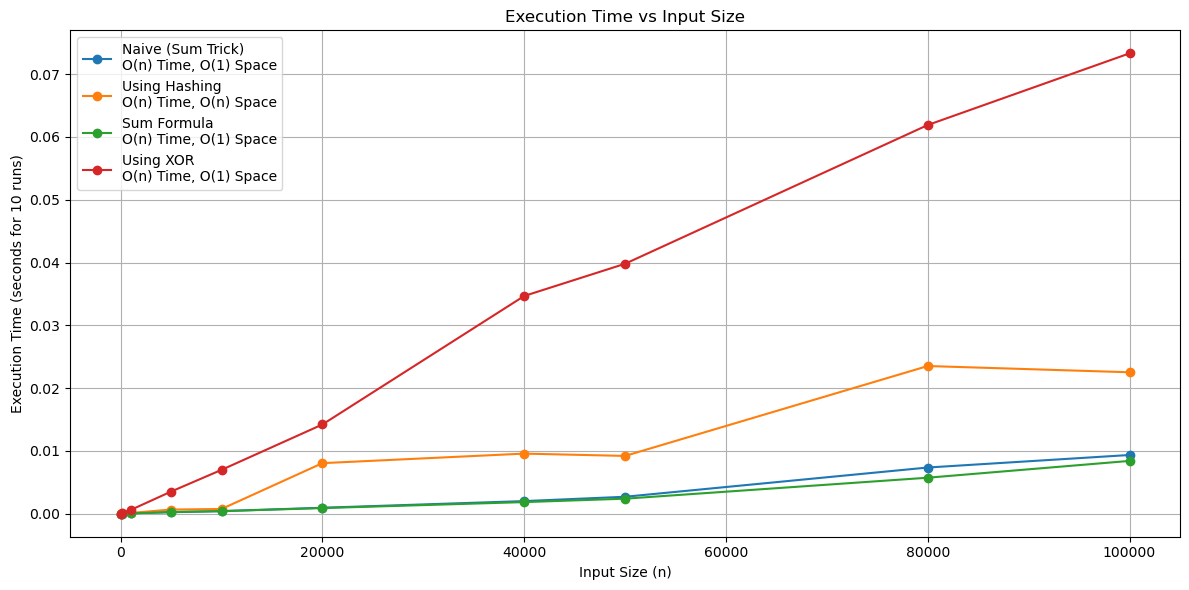

In [8]:
benchmark_algorithms_time_vs_n_line_plot()

# References
* https://www.geeksforgeeks.org/dsa/find-the-missing-number/